Complete the exercises below For **Assignment #4**.

Use **Markdown** cells for the non-code answers.

In this assignment we will work with the data underlying the *FiveThirtyEight* article ["Higher Rates Of Hate Crimes Are Tied To Income Inequality"](https://fivethirtyeight.com/features/higher-rates-of-hate-crimes-are-tied-to-income-inequality/).

Load the `tidymodels`, `readr`, and `moderndive` packages in the cell below.

In [3]:

library(tidymodels)
library(readr)
library(moderndive)

We can read the data from a **CSV file** at the following URL: [http://bit.ly/2ItxYg3](http://bit.ly/2ItxYg3).

Use the `read_csv` function to read the data into our R session. Call the new table `hate_crimes`.

In [7]:
hate_crimes <- read_csv("http://bit.ly/2ItxYg3")


glimpse(hate_crimes)
hate_crimes |> skim()

Rows: 51 Columns: 9
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (5): state, median_house_inc, trump_support, unemployment, urbanization
dbl (4): share_pop_metro, hs, hate_crimes, income

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 51
Columns: 9
$ state            <chr> "New Mexico", "Maine", "New York", "Illinois", "Delaw~
$ median_house_inc <chr> "low", "low", "low", "low", "high", "high", "high", "~
$ share_pop_metro  <dbl> 0.69, 0.54, 0.94, 0.90, 0.90, 1.00, 0.87, 0.86, 0.97,~
$ hs               <dbl> 83, 90, 85, 86, 87, 85, 89, 90, 81, 91, 89, 89, 87, 8~
$ hate_crimes      <dbl> 0.295, 0.616, 0.351, 0.195, 0.323, 0.095, 0.833, 0.67~
$ trump_support    <chr> "low", "low", "low", "low", "low", "low", "low", "low~
$ unemployment     <chr> "high", "low", "low", "high", "low", "high", "high", ~
$ urbanization     <chr> "low", "low", "high", "high", "high", "high", "high",~
$ income           <dbl> 46686, 51710, 54310, 54916, 57522, 58633, 58875, 5906~


ERROR: Error in skim(hate_crimes): could not find function "skim"


Next, let’s add the high-school degree variable into the mix by creating a scatterplot showing:

- Income on the y-axis (this is the `income` variable)
- Percent of adults 25 or older with a high school degree on the x-axis (this is the `hs` variable)
- The points colored by level of urbanization in a region (this is the variable `urbanization`)


**In addition, add a line of best fit (regression line) for each level of the variable urbanization (one for “low”, one for “high”).**

*Add the regression lines to the plot using the `geom_parallel_slopes` function from the `moderndive` package. This function will draw the regression lines based on fitting a regression model with parallel slopes (i.e., with no interaction between `hs` and `urbanization`).*

In [9]:
help(geom_parallel_slopes)

geom_parallel_slopes        package:moderndive         R Documentation

_P_a_r_a_l_l_e_l _s_l_o_p_e_s _r_e_g_r_e_s_s_i_o_n _m_o_d_e_l

_D_e_s_c_r_i_p_t_i_o_n:

     'geom_parallel_slopes()' fits parallel slopes model and adds its
     line output(s) to a 'ggplot' object. Basically, it fits a unified
     model with intercepts varying between groups (which should be
     supplied as standard ggplot2 grouping aesthetics: 'group',
     'color', 'fill', etc.). This function has the same nature as
     'geom_smooth()' from ggplot2 package, but provides functionality
     that 'geom_smooth()' currently doesn't have.

_U_s_a_g_e:

     geom_parallel_slopes(
       mapping = NULL,
       data = NULL,
       position = "identity",
       ...,
       se = TRUE,
       formula = y ~ x,
       n = 100,
       fullrange = FALSE,
       level = 0.95,
       na.rm = FALSE,
       show.legend = NA,
       inherit.aes = TRUE
     )
     
_A_r_g_u_m_e_

Warning message:
"Removed 3 rows containing non-finite values (`stat_parallel_slopes()`)."
Warning message:
"Removed 3 rows containing missing values (`geom_point()`)."


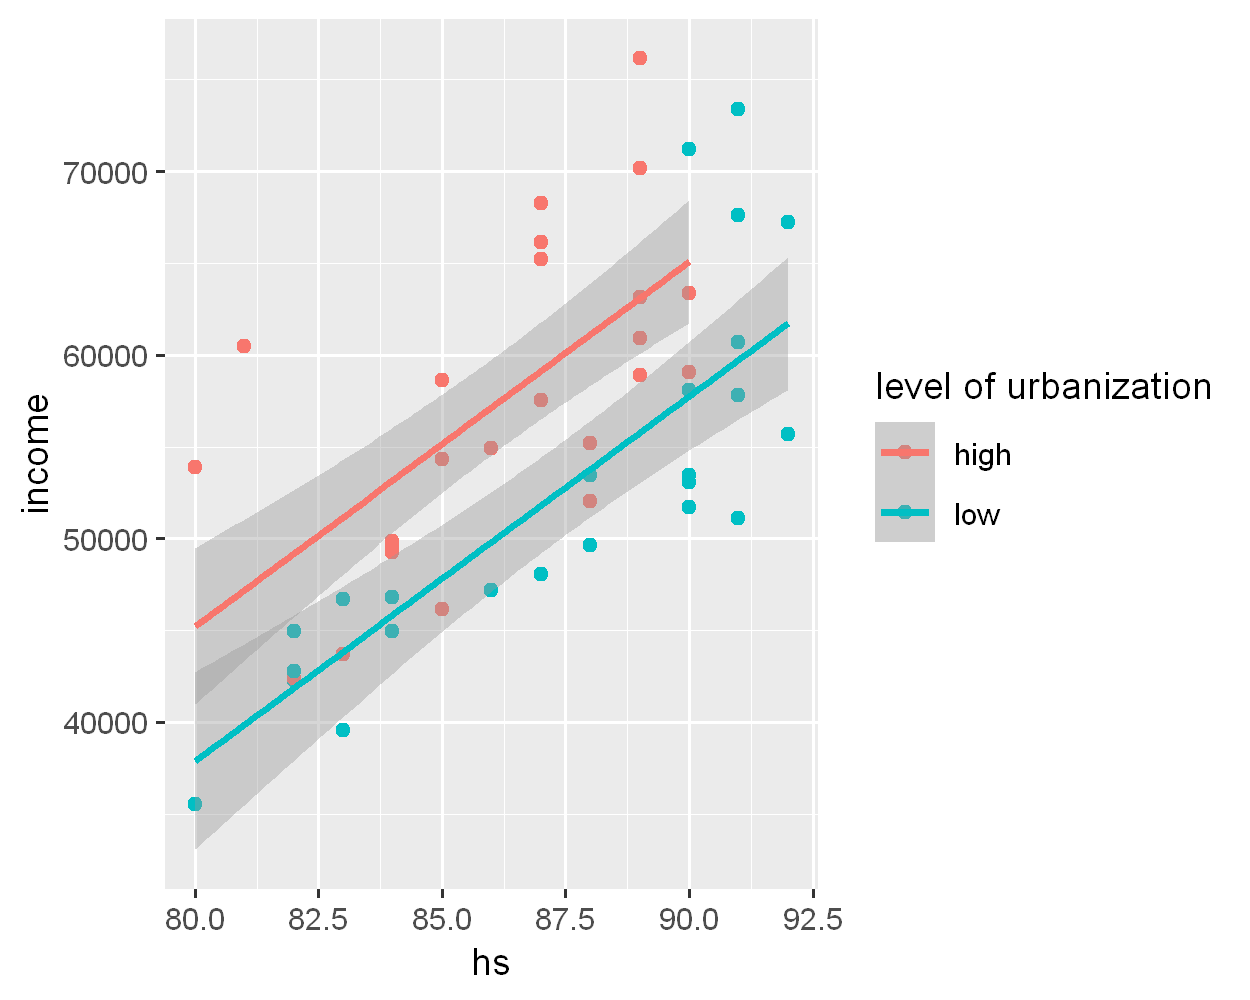

In [10]:


ggplot(hate_crimes) +
    geom_point(aes(x = hs, y= income, color = factor(urbanization))) + 
    labs(color = "level of urbanization") +
    geom_parallel_slopes(aes(x = hs, y = income, color = factor(urbanization)))




❓Which regression line (high urbanization or low urbanization) appears to have the larger intercept?

**Answer:**

High urbanization appears to have a higher intercept which would indicate that higher incomes are generally more urbanized regardless of the % of adults with a highschool degree. They are not completely independent of each other but it explains a possible relationship between increased urbanization with income.

Now let’s create a second scatterplot using the same variables, but this time draw the regression lines using `geom_smooth(method = "lm")`, which will allow for separate, non-parallel slopes for each urbanization group. 

**Code you your scatter plot in the cell below.**

In [12]:
help(geom_smooth)

geom_smooth              package:ggplot2               R Documentation

_S_m_o_o_t_h_e_d _c_o_n_d_i_t_i_o_n_a_l _m_e_a_n_s

_D_e_s_c_r_i_p_t_i_o_n:

     Aids the eye in seeing patterns in the presence of overplotting.
     'geom_smooth()' and 'stat_smooth()' are effectively aliases: they
     both use the same arguments. Use 'stat_smooth()' if you want to
     display the results with a non-standard geom.

_U_s_a_g_e:

     geom_smooth(
       mapping = NULL,
       data = NULL,
       stat = "smooth",
       position = "identity",
       ...,
       method = NULL,
       formula = NULL,
       se = TRUE,
       na.rm = FALSE,
       orientation = NA,
       show.legend = NA,
       inherit.aes = TRUE
     )
     
     stat_smooth(
       mapping = NULL,
       data = NULL,
       geom = "smooth",
       position = "identity",
       ...,
       method = NULL,
       formula = NULL,
       se = TRUE,
       n = 80,
       span = 0.75,
       ful

`geom_smooth()` using formula = 'y ~ x'


Warning message:
"Removed 3 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 3 rows containing missing values (`geom_point()`)."


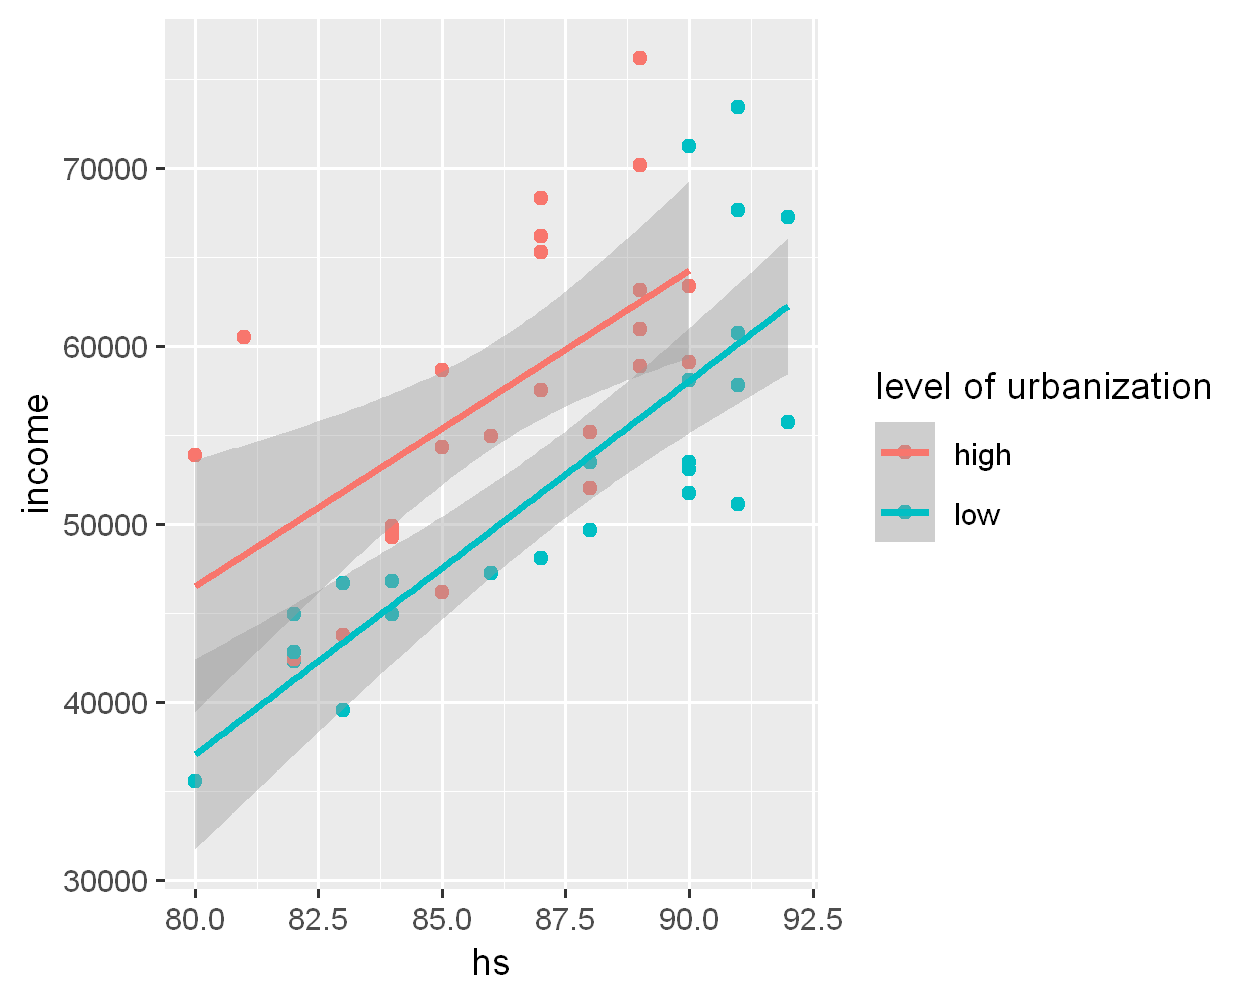

In [17]:
ggplot(hate_crimes, aes(x = hs, y= income, color = factor(urbanization))) +
    geom_point() + 
    labs(color = "level of urbanization") +
    geom_smooth(method = "lm")



❓Based on visually comparing the two models shown above, do you think it would be best to run a “parallel slopes” model (i.e. a model that estimates one shared slope for the two levels of urbanization), or a more complex “interaction model” (i.e. a model that estimates a separate slope for the two levels of urbanization)?

**Answer:**

Using only these examples I think a parallel model is more appropriate only considering that it produces better confidence intervals. However, I think that with a deeper data set with more observations that it could potentially sway the other way. Its clear that there is a distinct relationship between the target variable and the levels of urbanization and that given a different relationship the regression would behave differently. 

Fit the following two regression models that examine the relationship between household `income` (as response variable), and high-school education (`hs`) and `urbanization` as explanatory variables:

1. A parallel slopes model (i.e., no interaction between `hs` and `urbanization`). ❗️Save the data recipe and model under the variables `ps_rec` and `ps_mod`, respectively. 
1. A non-parallel slopes model (i.e., allow `hs` and `urbanization` to interact in your model). ❗️Save the data recipe and model under the variable: `nps_rec` and `nps_mod`, respectively.

**Code you your models in the cell below.**

In [18]:
# parallel slopes model

ps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |> 
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

ps_mod = mod |> fit(income ~ ., juice(ps_rec))

ps_mod

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
     (Intercept)                hs  urbanization_low  
         -113725              1987             -7333  


In [19]:
# non-parallel slopes model

# ❗️ you can use most of the code above, just add step_interact(~ starts_with("urbanization"):hs) to the recipe and
#    switch the variable names...

nps_rec = recipe(income ~ hs + urbanization, data = hate_crimes) |>
    step_naomit(everything()) |>   # remove missing values
    step_dummy(urbanization) |>    # dummy encode the urbanization variable
    step_interact(~ starts_with("urbanization"):hs) |>  # add the interaction term
    prep()                         # run the recipe on the training data provided

mod = linear_reg() |> set_engine('lm')

nps_mod = mod |> fit(income ~ ., juice(nps_rec))

nps_mod




Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

parsnip model object


Call:
stats::lm(formula = income ~ ., data = data)

Coefficients:
          (Intercept)                     hs       urbanization_low  
               -95647                   1777                 -35394  
urbanization_low_x_hs  
                  324  


The following code creates a table of your model predictions over the training data. Calculate the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (R<sup>2</sup>) for each model:

```r
rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)
```

1. Group rows by the `model` variable (use the `group_by` function).
1. Calculate the variance of income over the variance of your predictions for each model using the "grouped" data from the step above (use `summarize(r_squared = var(.pred) / var(income))`).

In [22]:
data <- rbind(
    augment(ps_mod, juice(ps_rec)) |> select(income, .pred, .resid) |> mutate(model = "parallel_slopes"),
    augment(nps_mod, juice(nps_rec)) |> select(income, .pred, .resid) |> mutate(model = "interaction")
)

data |> group_by(model) |> 
    summarize(r_squared = var(.pred) / var(income))


model,r_squared
<chr>,<dbl>
interaction,0.5746731
parallel_slopes,0.5716112


🎶 Note: you can also use the `glance` function with a model as input to find the coefficient of determination.

In [23]:
glance(ps_mod)
glance(nps_mod)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5716112,0.5525717,6325.667,30.02238,5.204241e-09,2,-486.6739,981.3479,988.8327,1800633086,45,48


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5746731,0.5456735,6374.244,19.81661,2.814509e-08,3,-486.5018,983.0035,992.3595,1787763166,44,48


❓Compare the adjusted proportion of variance accounted for in each model. Based on this comparison, which model do you prefer? Why? 

**Answer:**

When looking at the standard R^2 value it appears that the model with interaction has a better fit. However, when looking at the adjusted values it aligns better with the confidence intervals in the previous visual determination. Accounting for the degrees of freedom inherently removed some of the natural overfitting of a low observation data set. It appears that the parallel slopes model still genuinely outperforms the interaction model. Again, I think that with more observations you would likely see a flip. I would introduce some data enrichment to create a slightly larger data set to train the models on to determine the better model for generalized application.

❓Using your preferred model, based on your regression model parameters (and the data visualizations), is `income` greater in states that have lower or higher levels of `urbanization`? By how much?

**Hint:** use the `tidy` function with your model as input to access the parameters in a nice table.

**Answer:**

Income is greater in states that have higher urbanization. States with lower urbanization, on average, income is $7333.32 lower than states with high urbanization. The P value also indicates that these values are statistically significant.

In [27]:
tidy(ps_mod)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-113725.193,23552.9187,-4.828497,1.624694e-05
hs,1986.794,272.9303,7.279490,3.930730e-09
urbanization_low,-7333.326,1857.6592,-3.947616,2.744526e-04


❓For every one percentage point increase of high-school educated adults in a state (`hs` variable), what is the associated average increase in `income`?

**Answer:**

The average increase is determined by the hs estimate column in the tidy output showing an average increase of $1986.79 per one percentage point increase which indicates an increase in high school educated adults generally results in areas of higher income.